<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1_2_1VisualizingPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non Linear Functions

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

# Generate training data
def function1():
  x = np.linspace(-2 * np.pi, 2 * np.pi, 2000)
  y = 10 * np.sin(np.pi * x) - 10. # Keeps the range between (-10,10)
  return x,y


Converting into Pytorch Tensor


In [ ]:
# Convert to PyTorch tensors
def convertToTensors(x,y):
  x_tensor = torch.from_numpy(x).float().unsqueeze(1)
  y_tensor = torch.from_numpy(y).float().unsqueeze(1)
  return x_tensor,y_tensor

Shallow Neural Network

In [ ]:
class DNN2(torch.nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = torch.nn.Linear(1, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model2 = DNN2()
total_params2 = sum(p.numel() for p in model2.parameters())
print("Number of parameters in the above DNN model : ", total_params2)



Number of parameters in the above DNN model :  8513


In [ ]:
summary(model2,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             128
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


Loss Function and Training the model



In [ ]:

#weights_flattened = weights_array.flatten()
from sklearn.decomposition import PCA
# Perform PCA on the flattened array

def pca(weights_matrix, is_layer):
  c=['r','b', 'g', 'y']
  if is_layer:
    c = c*16
  else:
    c= c * 33
    c = c[:131]
  pca_model = PCA(n_components=2)
  pca_model.fit(weights_matrix)
  weights_transformed = pca_model.transform(weights_matrix)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  title = None
  if is_layer:
    title = "PCA transformation 2D of layer 1"
  else:
    title = "PCA transformation 2D of whole model"
  ax.set_title(title)
  ax.scatter(weights_transformed[:,0], weights_transformed[:,1], marker='.', c=c)
  

<ipython-input-134-cbdd4734c62b>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights_array = np.array(weights_list)


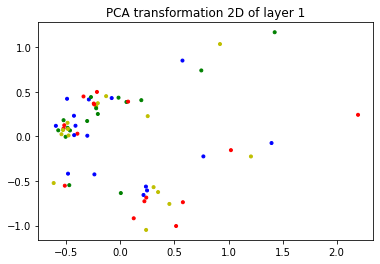

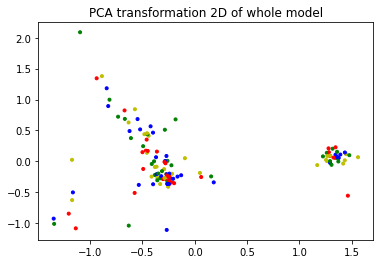

In [ ]:
x2,y2 = function1()
x_tensor2,y_tensor2 = convertToTensors(x2,y2)
trainingIterations = 8
Epochs = 90 # Should be divisible by 3 
# layer1Conn = 1 * 64
# layer2Conn = 64 * 64
# layer3Conn = 64 * 64
# layer4Conn = 64 * 1
allLosses = []
allWeights = []
# totalConnections = layer1Conn + layer2Conn + layer3Conn + layer4Conn 

weightsLayer2 = []
# model2 = DNN2()
for trainIter in range(trainingIterations):
 
  # Defining the loss and optimizer
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

  # Training the model
  losses2 = [] # Training losses
  accuracies = []
  index = 0
  weights_list = []
  weightsTempL2 = []
  for epoch in range(Epochs):
      # running_loss = 0.0
      # running_correct = 0
      # Forward pass
      y_pred2 = model2(x_tensor2)
      loss = criterion(y_pred2, y_tensor2)
      
      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      # Save the loss for plotting
      
      # running_loss += loss.item()
      losses2.append(loss.item())
      if epoch % 3 == 0:
        weights = []
        weights_fc2 = model2.fc2.weight.detach().numpy().flatten()
        for name, param in model2.named_parameters():
            if 'weight' in name:
                weights.append(param.detach().numpy().flatten())
                
        weights_list.append(weights)
        weightsTempL2.append(weights_fc2)
  allLosses.append(losses2)
  allWeights.append(weights_list)
  weightsLayer2.append(weightsTempL2)

# Convert the list of weights to a NumPy array
weights_array = np.array(weights_list)

# Collecting model weights
layer_count = 1
weights_layer_1 = None
weight_matrix = np.empty(shape=(1,64))
for name, param in model2.named_parameters():
  if 'weight' in name:
    model_weights = param.detach().numpy()
    if layer_count == 1:
      model_weights = model_weights.reshape(1, 64)
    if layer_count == 2:
      weights_layer_1 = model_weights
    weight_matrix = np.concatenate((weight_matrix, model_weights), dtype="float64")
    layer_count = layer_count + 1

weight_matrix = np.nan_to_num(weight_matrix)
layer1_weights_transformed = pca(weights_layer_1, True)
model_weight_transformed = pca(weight_matrix, False)

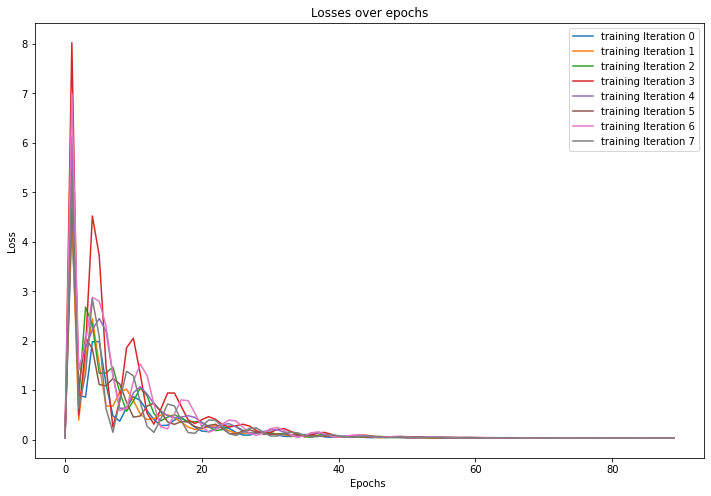

In [ ]:
from sklearn.decomposition import PCA
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(8):
  ax.plot(allLosses[i], label=f"training Iteration {i}")

ax.set_title("Losses over epochs")
ax.set_xlabel("Epochs ")
ax.set_ylabel("Loss")
ax.legend()
plt.show()
